In [1]:
import os
import cv2
import json
import numpy as np

def load_idd_polygon_data(data_dir, split="train"):
    """
    Loads images and polygon masks (JSON) from the IDD dataset.

    Args:
        data_dir (str): Path to the main dataset directory.
        split (str): "train", "val", or "test".

    Returns:
        tuple: A tuple containing two lists:
            - images (list): List of loaded images (NumPy arrays).
            - masks (list): List of loaded segmentation masks (NumPy arrays).
    """

    image_dir = os.path.join(data_dir, "leftImg8bit", split)
    mask_dir = os.path.join(data_dir, "gtFine", split)

    images = []
    masks = []

    for numbered_folder in os.listdir(image_dir):
        numbered_image_dir = os.path.join(image_dir, numbered_folder)
        numbered_mask_dir = os.path.join(mask_dir, numbered_folder)

        if os.path.isdir(numbered_image_dir) and os.path.isdir(numbered_mask_dir):
            image_filenames = sorted(os.listdir(numbered_image_dir))

            for filename in image_filenames:
                if filename.endswith("_leftImg8bit.png"):
                    image_path = os.path.join(numbered_image_dir, filename)
                    mask_filename = filename.replace("_leftImg8bit.png", "_gtFine_polygons.json")
                    mask_path = os.path.join(numbered_mask_dir, mask_filename)

                    if os.path.exists(mask_path):
                        try:
                            image = cv2.imread(image_path)
                            if image is None:
                                print(f"Warning: Could not read image: {filename}")
                                continue

                            with open(mask_path, "r") as f:
                                polygon_data = json.load(f)

                            # Create a blank mask with the same size as the image
                            mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

                            # Process the polygon data and draw polygons on the mask
                            # This is the complex part and depends on the JSON structure
                            # We'll need to write code to extract the polygon coordinates
                            # and use cv2.fillPoly() to draw them on the mask.
                            # Example (assuming a simple polygon structure):
                            for object_data in polygon_data["objects"]:  # Adjust "objects" key
                                if "polygon" in object_data: #Adjust "polygon" key
                                    polygon_points = np.array(object_data["polygon"], np.int32) #Adjust "polygon" key
                                    cv2.fillPoly(mask, [polygon_points], 255) # Fill polygon with white (255)

                            images.append(image)
                            masks.append(mask)

                        except Exception as e:
                            print(f"Error processing {filename}: {e}")
                    else:
                        print(f"Warning: Mask not found for {filename}")

    return images, masks

# Example usage:
data_directory = r"C:\Users\Sejal Hanmante\Downloads\idd-20k-II\idd20kII"  # Replace with your dataset path.
images, masks = load_idd_polygon_data(data_directory, split="train")

if images and masks:
    print(f"Loaded {len(images)} images and {len(masks)} masks.")
    # ... (process images and masks)
else:
    print("No images or masks loaded.")

No images or masks loaded.


In [2]:
import os
import cv2
import json
import numpy as np

def load_idd_polygon_data(data_dir, split="train", load_percentage=30):
    """
    Loads a specified percentage of images and polygon masks (JSON) from the IDD dataset.

    Args:
        data_dir (str): Path to the main dataset directory.
        split (str): "train", "val", or "test".
        load_percentage (int): Percentage of files to load (1-100).

    Returns:
        tuple: A tuple containing two lists:
            - images (list): List of loaded images (NumPy arrays).
            - masks (list): List of loaded segmentation masks (NumPy arrays).
    """

    image_dir = os.path.join(data_dir, "leftImg8bit", split)
    mask_dir = os.path.join(data_dir, "gtFine", split)

    images = []
    masks = []

    for numbered_folder in os.listdir(image_dir):
        numbered_image_dir = os.path.join(image_dir, numbered_folder)
        numbered_mask_dir = os.path.join(mask_dir, numbered_folder)

        if os.path.isdir(numbered_image_dir) and os.path.isdir(numbered_mask_dir):
            image_filenames = sorted(os.listdir(numbered_image_dir))
            total_files = len(image_filenames)
            files_to_load = int(total_files * (load_percentage / 100))

            for i, filename in enumerate(image_filenames):
                if i >= files_to_load:
                    break  # Stop loading once the desired percentage is reached

                if filename.endswith("_leftImg8bit.png"):
                    image_path = os.path.join(numbered_image_dir, filename)
                    mask_filename = filename.replace("_leftImg8bit.png", "_gtFine_polygons.json")
                    mask_path = os.path.join(numbered_mask_dir, mask_filename)

                    if os.path.exists(mask_path):
                        try:
                            image = cv2.imread(image_path)
                            if image is None:
                                print(f"Warning: Could not read image: {filename}")
                                continue

                            with open(mask_path, "r") as f:
                                polygon_data = json.load(f)

                            mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

                            for object_data in polygon_data["objects"]:
                                if "polygon" in object_data:
                                    polygon_points = np.array(object_data["polygon"], np.int32)
                                    cv2.fillPoly(mask, [polygon_points], 255)

                            images.append(image)
                            masks.append(mask)

                        except Exception as e:
                            print(f"Error processing {filename}: {e}")
                    else:
                        print(f"Warning: Mask not found for {filename}")

    return images, masks

# Example usage:
data_directory = "D:/IDD_Segmentation" # Replace with your dataset path.
images, masks = load_idd_polygon_data(data_directory, split="train", load_percentage=30)

if images and masks:
    print(f"Loaded {len(images)} images and {len(masks)} masks.")
    # ... (process images and masks)
else:
    print("No images or masks loaded.")

Loaded 2045 images and 2045 masks.


Successfully loaded 2045 images and 2045 masks from D:/IDD_Segmentation


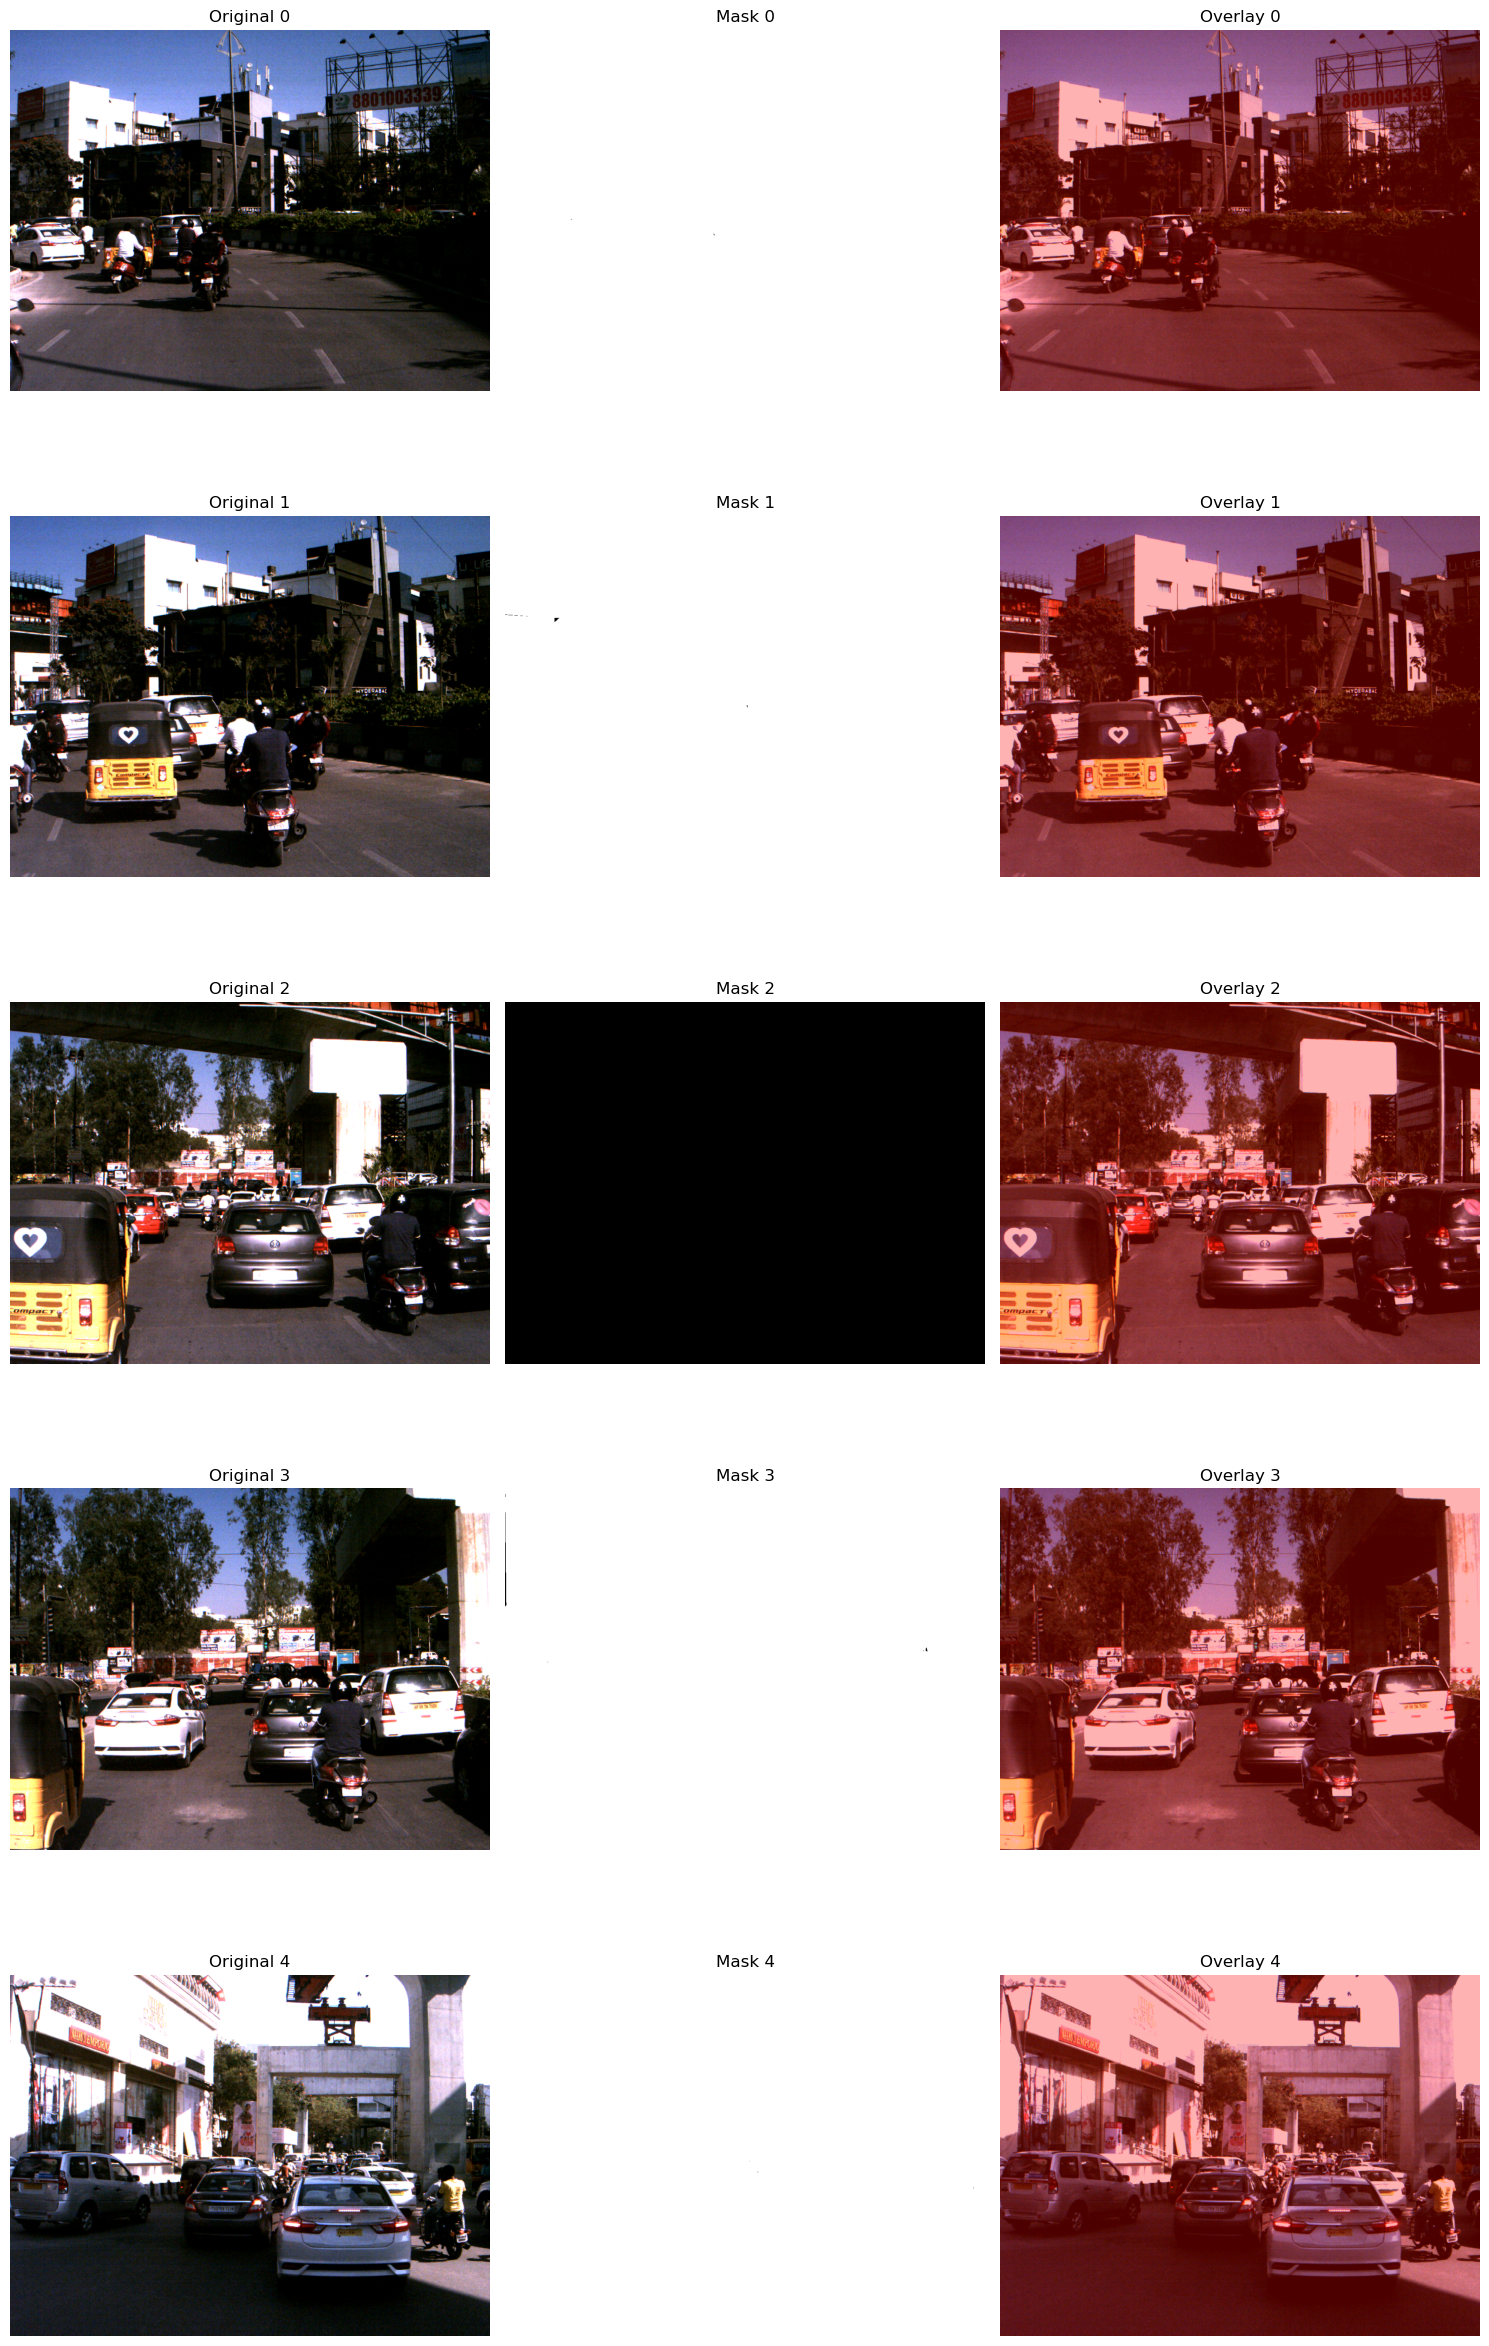

In [1]:
import os
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

def load_idd_polygon_data(data_dir, split="train", load_percentage=30):
    """Loads images and polygon masks from IDD dataset."""
    image_dir = os.path.join(data_dir, "leftImg8bit", split)
    mask_dir = os.path.join(data_dir, "gtFine", split)

    images = []
    masks = []

    for numbered_folder in os.listdir(image_dir):
        numbered_image_dir = os.path.join(image_dir, numbered_folder)
        numbered_mask_dir = os.path.join(mask_dir, numbered_folder)

        if os.path.isdir(numbered_image_dir) and os.path.isdir(numbered_mask_dir):
            image_filenames = sorted(os.listdir(numbered_image_dir))
            total_files = len(image_filenames)
            files_to_load = int(total_files * (load_percentage / 100))

            for i, filename in enumerate(image_filenames):
                if i >= files_to_load:
                    break

                if filename.endswith("_leftImg8bit.png"):
                    image_path = os.path.join(numbered_image_dir, filename)
                    mask_filename = filename.replace("_leftImg8bit.png", "_gtFine_polygons.json")
                    mask_path = os.path.join(numbered_mask_dir, mask_filename)

                    if os.path.exists(mask_path):
                        try:
                            image = cv2.imread(image_path)
                            if image is None:
                                print(f"Warning: Could not read image: {filename}")
                                continue

                            with open(mask_path, "r") as f:
                                polygon_data = json.load(f)

                            mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
                            for object_data in polygon_data["objects"]:
                                if "polygon" in object_data:
                                    polygon_points = np.array(object_data["polygon"], np.int32)
                                    cv2.fillPoly(mask, [polygon_points], 255)

                            images.append(image)
                            masks.append(mask)

                        except Exception as e:
                            print(f"Error processing {filename}: {e}")
                    else:
                        print(f"Warning: Mask not found for {filename}")
    return images, masks

def visualize_masks(images, masks, num_samples=5):
    """Visualize images with mask overlays."""
    plt.figure(figsize=(15, 5*num_samples))
    
    for i in range(min(num_samples, len(images))):
        img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
        mask = masks[i]
        
        # Create colored mask (red)
        colored_mask = np.zeros_like(images[i])
        colored_mask[mask == 255] = [255, 0, 0]
        
        # Blend image and mask
        overlay = cv2.addWeighted(img_rgb, 0.7, colored_mask, 0.3, 0)
        
        # Display
        plt.subplot(num_samples, 3, i*3 + 1)
        plt.imshow(img_rgb)
        plt.title(f"Original {i}")
        plt.axis('off')
        
        plt.subplot(num_samples, 3, i*3 + 2)
        plt.imshow(mask, cmap='gray')
        plt.title(f"Mask {i}")
        plt.axis('off')
        
        plt.subplot(num_samples, 3, i*3 + 3)
        plt.imshow(overlay)
        plt.title(f"Overlay {i}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Main execution
data_directory = "D:/IDD_Segmentation"
images, masks = load_idd_polygon_data(data_directory, split="train", load_percentage=30)

if images and masks:
    print(f"Successfully loaded {len(images)} images and {len(masks)} masks from D:/IDD_Segmentation")
    visualize_masks(images, masks, num_samples=5)
else:
    print("No images or masks loaded. Please check:")
    print(f"1. Dataset exists at {data_directory}")
    print("2. The directory structure follows IDD format:")
    print("   - leftImg8bit/train/...")
    print("   - gtFine/train/...")
    print("3. Files have correct naming (_leftImg8bit.png and _gtFine_polygons.json)")

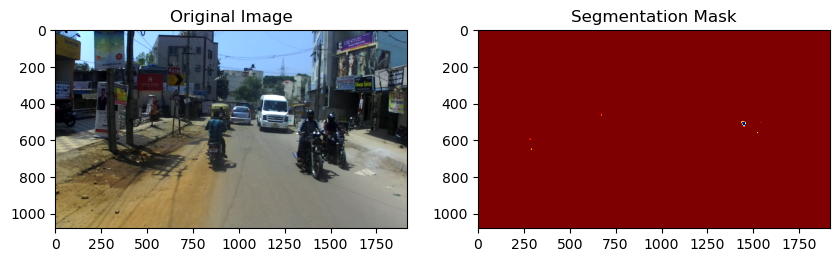

In [13]:
import matplotlib.pyplot as plt
import random

# Select a random index
idx = random.randint(0, len(images) - 1)

# Plot the image and mask
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))

ax[0].set_title("Original Image")

ax[1].imshow(masks[idx], cmap="jet")
ax[1].set_title("Segmentation Mask")

plt.show()


Loaded 643 images and 643 masks.


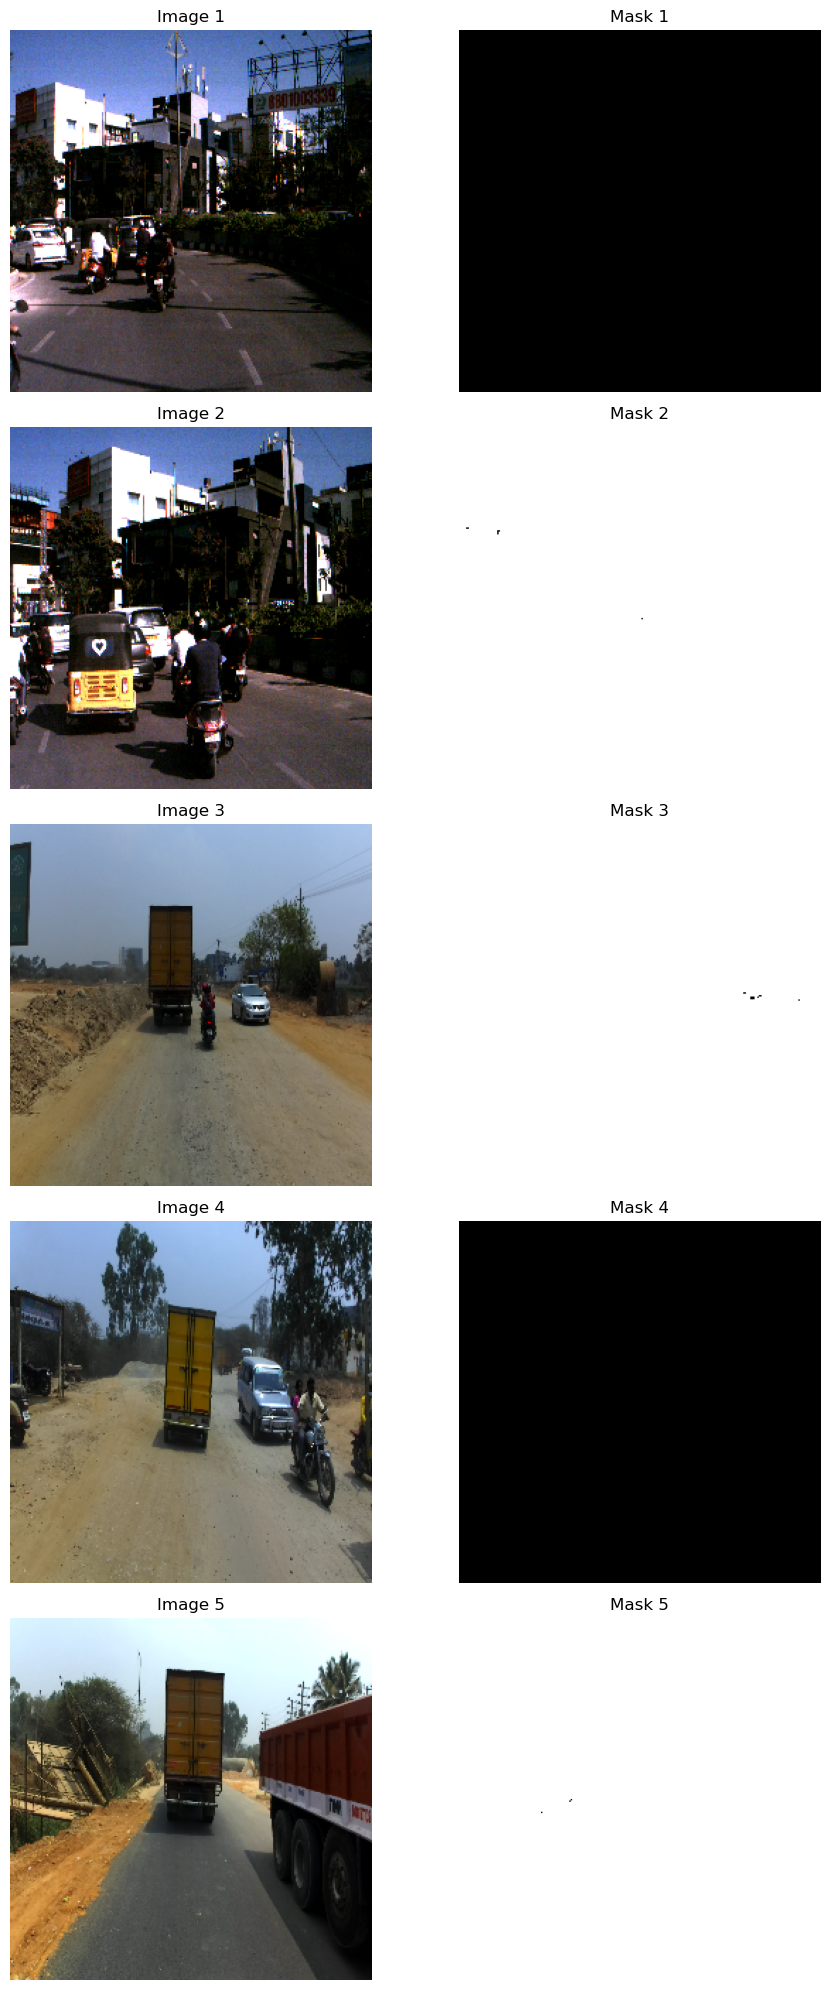

In [17]:
import os
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def load_idd_polygon_data(data_dir, split="train", load_percentage=30):
    """
    Loads a specified percentage of images and polygon masks (JSON) from the IDD dataset.

    Args:
        data_dir (str): Path to the main dataset directory.
        split (str): "train", "val", or "test".
        load_percentage (int): Percentage of files to load (1-100).

    Returns:
        tuple: Two lists (images, masks).
    """

    image_dir = os.path.join(data_dir, "leftImg8bit", split)
    mask_dir = os.path.join(data_dir, "gtFine", split)

    images, masks = [], []

    for numbered_folder in os.listdir(image_dir):
        numbered_image_dir = os.path.join(image_dir, numbered_folder)
        numbered_mask_dir = os.path.join(mask_dir, numbered_folder)

        if os.path.isdir(numbered_image_dir) and os.path.isdir(numbered_mask_dir):
            image_filenames = sorted(os.listdir(numbered_image_dir))
            total_files = len(image_filenames)
            files_to_load = int(total_files * (load_percentage / 100))

            for i, filename in enumerate(image_filenames):
                if i >= files_to_load:
                    break  

                if filename.endswith("_leftImg8bit.png"):
                    image_path = os.path.join(numbered_image_dir, filename)
                    mask_filename = filename.replace("_leftImg8bit.png", "_gtFine_polygons.json")
                    mask_path = os.path.join(numbered_mask_dir, mask_filename)

                    if os.path.exists(mask_path):
                        try:
                            image = cv2.imread(image_path)
                            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

                            with open(mask_path, "r") as f:
                                polygon_data = json.load(f)

                            # Initialize an empty mask (background is 0)
                            mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

                            # Fill polygon regions with class index 1
                            for object_data in polygon_data["objects"]:
                                if "polygon" in object_data:
                                    polygon_points = np.array(object_data["polygon"], np.int32)
                                    cv2.fillPoly(mask, [polygon_points], 1)  # Fill with class label 1

                            images.append(image)
                            masks.append(mask)

                        except Exception as e:
                            print(f"Error processing {filename}: {e}")
                    else:
                        print(f"Warning: Mask not found for {filename}")

    return images, masks


def preprocess(image, mask, img_size=(256, 256)):
    """Resizes and normalizes image-mask pair for TensorFlow models."""
    image = cv2.resize(image, img_size)
    mask = cv2.resize(mask, img_size, interpolation=cv2.INTER_NEAREST)  # Nearest-neighbor for masks

    # Normalize image
    image = image.astype(np.float32) / 255.0

    # Convert mask to categorical labels (if multi-class, otherwise keep binary)
    mask = mask.astype(np.uint8)

    return image, mask


def view_images_with_masks(images, masks, num_samples=5):
    """
    Displays images and their corresponding masks.

    Args:
        images (list): List of loaded images.
        masks (list): List of segmentation masks.
        num_samples (int): Number of images to display.
    """
    plt.figure(figsize=(10, num_samples * 4))

    for i in range(min(num_samples, len(images))):
        image, mask = preprocess(images[i], masks[i])

        plt.subplot(num_samples, 2, 2 * i + 1)
        plt.imshow(image)
        plt.title(f"Image {i+1}")
        plt.axis("off")

        plt.subplot(num_samples, 2, 2 * i + 2)
        plt.imshow(mask, cmap="gray")
        plt.title(f"Mask {i+1}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


# Example usage
data_directory = "D:/IDD_Segmentation"  # Replace with your dataset path
images, masks = load_idd_polygon_data(data_directory, split="train", load_percentage=10)

if images and masks:
    print(f"Loaded {len(images)} images and {len(masks)} masks.")
    view_images_with_masks(images, masks, num_samples=5)
else:
    print("No images or masks loaded.")


In [19]:
import cv2, os, random
import numpy as np
import shutil 
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
import os

dataset_path = r'C:/Users/Sejal Hanmante/Downloads/idd-20k-II/idd20kII/'  # Change as needed
if os.path.exists(dataset_path):
    print("Available directories:", os.listdir(dataset_path))
else:
    print("Error: Dataset path does not exist.")


Available directories: ['gtFine', 'leftImg8bit']


In [30]:
import os

dataset_path = r'C:/Users/Sejal Hanmante/Downloads/idd-20k-II/idd20kII/'

# Check the "leftImg8bit" subdirectories
leftImg8bit_path = os.path.join(dataset_path, "leftImg8bit")
if os.path.exists(leftImg8bit_path):
    print("Available splits in leftImg8bit:", os.listdir(leftImg8bit_path))
else:
    print("Error: 'leftImg8bit' path does not exist.")

# Check the "gtFine" subdirectories
gtFine_path = os.path.join(dataset_path, "gtFine")
if os.path.exists(gtFine_path):
    print("Available splits in gtFine:", os.listdir(gtFine_path))
else:
    print("Error: 'gtFine' path does not exist.")


Available splits in leftImg8bit: ['test', 'train', 'val']
Available splits in gtFine: ['train', 'val']


In [31]:
import os

data = r'C:/Users/Sejal Hanmante/Downloads/idd-20k-II/idd20kII/'

img_train = os.path.join(data, 'leftImg8bit', 'train')
seg_train = os.path.join(data, 'gtFine', 'train')

img_val = os.path.join(data, 'leftImg8bit', 'val')
seg_val = os.path.join(data, 'gtFine', 'val')

img_test = os.path.join(data, 'leftImg8bit', 'test')

# Verify if paths exist
for path in [img_train, seg_train, img_val, seg_val, img_test]:
    if os.path.exists(path):
        print(f"Path exists: {path}")
    else:
        print(f"Error: Path does not exist: {path}")


Path exists: C:/Users/Sejal Hanmante/Downloads/idd-20k-II/idd20kII/leftImg8bit\train
Path exists: C:/Users/Sejal Hanmante/Downloads/idd-20k-II/idd20kII/gtFine\train
Path exists: C:/Users/Sejal Hanmante/Downloads/idd-20k-II/idd20kII/leftImg8bit\val
Path exists: C:/Users/Sejal Hanmante/Downloads/idd-20k-II/idd20kII/gtFine\val
Path exists: C:/Users/Sejal Hanmante/Downloads/idd-20k-II/idd20kII/leftImg8bit\test


In [32]:
img_train_files = sorted(os.listdir(img_train))
seg_train_files = sorted(os.listdir(seg_train))
img_val_files = sorted(os.listdir(img_val))
seg_val_files = sorted(os.listdir(seg_val))
img_test_files = sorted(os.listdir(img_test))

In [33]:
import os
import shutil

# Define dataset root path
data_root = r'C:/Users/Sejal Hanmante/Downloads/idd-20k-II/idd20kII/'

# Define source paths
img_train = os.path.join(data_root, 'leftImg8bit', 'train')
img_val = os.path.join(data_root, 'leftImg8bit', 'val')
img_test = os.path.join(data_root, 'leftImg8bit', 'test')

seg_train = os.path.join(data_root, 'gtFine', 'train')
seg_val = os.path.join(data_root, 'gtFine', 'val')

# Define destination paths
dest_train_img = os.path.join(data_root, 'merged', 'leftImg8bit', 'train')
dest_val_img = os.path.join(data_root, 'merged', 'leftImg8bit', 'val')
dest_test_img = os.path.join(data_root, 'merged', 'leftImg8bit', 'test')

dest_train_seg = os.path.join(data_root, 'merged', 'gtFine', 'train')
dest_val_seg = os.path.join(data_root, 'merged', 'gtFine', 'val')

# Ensure destination directories exist
for path in [dest_train_img, dest_val_img, dest_test_img, dest_train_seg, dest_val_seg]:
    os.makedirs(path, exist_ok=True)

def copy_files(source_root, destination_root):
    """ Copy files from nested directories to a single folder. """
    for subfolder in os.listdir(source_root):
        subpath = os.path.join(source_root, subfolder)
        if os.path.isdir(subpath):
            for file in os.listdir(subpath):
                source_file = os.path.join(subpath, file)
                destination_file = os.path.join(destination_root, file)
                try:
                    shutil.copy(source_file, destination_file)
                except Exception as e:
                    print(f"Error copying {source_file}: {e}")

# Copy train images and labels
copy_files(img_train, dest_train_img)
copy_files(seg_train, dest_train_seg)

# Copy val images and labels
copy_files(img_val, dest_val_img)
copy_files(seg_val, dest_val_seg)

# Copy test images
copy_files(img_test, dest_test_img)

print("Files copied successfully!")


Files copied successfully!


## Loading final data 

In [ ]:
data = r'C:/Users/Sejal Hanmante/Downloads/idd-20k-II/idd20kII/'

img_train = os.path.join(data, 'leftImg8bit/train/')
seg_train = os.path.join(data, 'gtFine/train/')

img_val = os.path.join(data, 'leftImg8bit/val/')
seg_val = os.path.join(data, 'gtFine/val/')

img_test = os.path.join(data, 'leftImg8bit/test/')  
seg_test = os.path.join(data, 'gtFine/test/')  # Assuming test labels exist


In [39]:
img_train_files = sorted(os.listdir(img_train))
seg_train_files = sorted(os.listdir(seg_train))
img_val_files = sorted(os.listdir(img_val))
seg_val_files = sorted(os.listdir(seg_val))

In [40]:
train_img = os.listdir(img_train)
train_img.sort()
train_seg = os.listdir(seg_train)
train_seg.sort()

val_img = os.listdir(img_val)
val_img.sort()
val_seg = os.listdir(seg_val)
val_seg.sort()

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Define the correct merged train folder path
merged_train_images_path = "C:/Users/Sejal Hanmante/Downloads/idd-20k-II/mergedleftImg8bit/train/"
merged_train_masks_path = "C:/Users/Sejal Hanmante/Downloads/idd-20k-II/merged/gtFine/train/"

def view_random_image_with_mask(image_dir, mask_dir):
    # Get a list of all images in the merged/train folder
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    
    if not image_files:
        print("No images found in the directory.")
        return
    
    # Select a random image
    random_image = random.choice(image_files)
    
    # Construct the corresponding mask filename
    mask_filename = random_image.replace("_leftImg8bit.jpg", "_gtFine_polygons.json")
    
    # Load the image and mask
    image_path = os.path.join(image_dir, random_image)
    mask_path = os.path.join(mask_dir, mask_filename)

    if not os.path.exists(mask_path):
        print(f"Mask not found for {random_image}")
        return

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Read mask in grayscale
    
    # Resize for visualization
    image_resized = cv2.resize(image, (256, 256))
    mask_resized = cv2.resize(mask, (256, 256))

    # Display the image and mask
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image_resized)
    ax[0].set_title("Image")
    ax[0].axis("off")

    ax[1].imshow(mask_resized, cmap="gray")
    ax[1].set_title("Mask")
    ax[1].axis("off")

    plt.show()

# Call the function
view_random_image_with_mask(merged_train_images_path, merged_train_masks_path)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/Sejal Hanmante/Downloads/idd-20k-II/mergedleftImg8bit/train/'

In [50]:
import os
import random
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

# Define the correct merged train folder path
merged_train_images_path = r"C:\Users\Sejal Hanmante\Downloads\idd-20k-II\idd20kII\merged\leftImg8bit\train"
merged_train_masks_path = r"C:\Users\Sejal Hanmante\Downloads\idd-20k-II\idd20kII\merged\gtFine\train"

def load_mask_from_json(mask_path, image_shape):
    """
    Load mask from JSON file and convert polygon annotations into a binary mask.

    Args:
        mask_path (str): Path to the JSON annotation file.
        image_shape (tuple): Shape of the corresponding image (height, width).

    Returns:
        numpy.ndarray: Binary mask.
    """
    mask = np.zeros((image_shape[0], image_shape[1]), dtype=np.uint8)

    with open(mask_path, 'r') as f:
        data = json.load(f)

    for obj in data.get("objects", []):
        if "polygon" in obj:
            polygon = np.array(obj["polygon"], np.int32)
            cv2.fillPoly(mask, [polygon], 255)  # Fill the polygon with white (255)

    return mask

def view_random_image_with_mask(image_dir, mask_dir):
    # Get a list of all images in the merged/train folder
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

    if not image_files:
        print("No images found in the directory.")
        return

    # Select a random image
    random_image = random.choice(image_files)

    # Construct the corresponding mask filename
    mask_filename = random_image.replace("_leftImg8bit.png", "_gtFine_polygons.json")

    # Load the image and mask
    image_path = os.path.join(image_dir, random_image)
    mask_path = os.path.join(mask_dir, mask_filename)

    if not os.path.exists(mask_path):
        print(f"Mask not found for {random_image}")
        return

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display

    # Get image shape for mask creation
    image_shape = image.shape[:2]  # (height, width)

    # Load the mask from JSON
    mask = load_mask_from_json(mask_path, image_shape)

    # Resize for visualization
    image_resized = cv2.resize(image, (256, 256))
    mask_resized = cv2.resize(mask, (256, 256))

    # Display the image and mask
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image_resized)
    ax[0].set_title("Image")
    ax[0].axis("off")

    ax[1].imshow(mask_resized, cmap="gray")
    ax[1].set_title("Mask")
    ax[1].axis("off")

    plt.show()

# Call the function
view_random_image_with_mask(merged_train_images_path, merged_train_masks_path)


Mask not found for frame4684_leftImg8bit.jpg


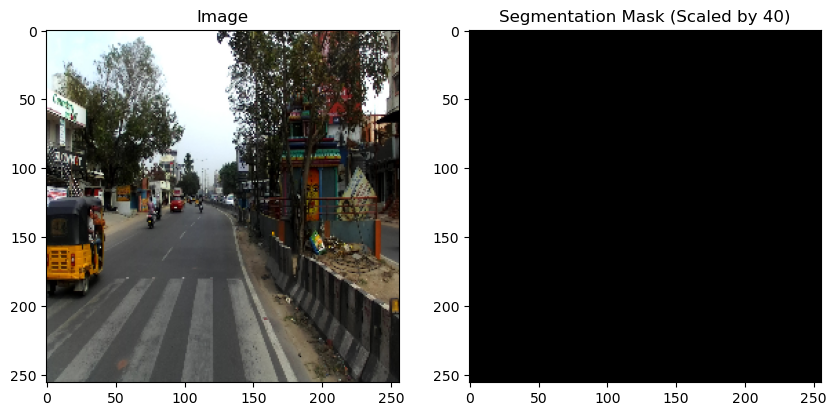

In [56]:
import os
import json
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Define paths
image_dir = r"C:/Users/Sejal Hanmante/Downloads/idd-20k-II/idd20kII/merged/leftImg8bit/train/"
mask_dir = r"C:/Users/Sejal Hanmante/Downloads/idd-20k-II/idd20kII/merged/gtFine/train/"

def load_image_and_mask(image_path, mask_path):
    # Load and decode image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Load JSON mask file
    with open(mask_path, "r") as file:
        mask_data = json.load(file)

    # Create an empty mask with the same height & width as the image
    height, width = mask_data["imgHeight"], mask_data["imgWidth"]
    mask = np.zeros((height, width), dtype=np.uint8)

    # Fill polygons for each object in the mask
    for obj in mask_data["objects"]:
        if "polygon" in obj:
            polygon_points = np.array(obj["polygon"], np.int32)
            cv2.fillPoly(mask, [polygon_points], 255)  # Fill with white

    # Multiply mask values by 40 for better visualization
    mask = mask * 40  

    # Resize image and mask
    image = cv2.resize(image, (256, 256))
    mask = cv2.resize(mask, (256, 256))

    return image, mask

def view_random_image_with_mask(image_dir, mask_dir):
    # Get all image files
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    
    if not image_files:
        print("No images found in the directory.")
        return

    # Randomly select an image
    selected_image = np.random.choice(image_files)
    image_path = os.path.join(image_dir, selected_image)

    # Find the corresponding mask file (JSON format)
    mask_filename = selected_image.replace("_leftImg8bit.jpg", "_gtFine_polygons.json")
    mask_path = os.path.join(mask_dir, mask_filename)

    if not os.path.exists(mask_path):
        print(f"Mask file not found for {selected_image}")
        return

    # Load image and mask
    image, mask = load_image_and_mask(image_path, mask_path)

    # Display the image and mask
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Image")
    
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap="gray")
    plt.title("Segmentation Mask (Scaled by 40)")
    
    plt.show()

# Run the function
view_random_image_with_mask(image_dir, mask_dir)


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
from tqdm import tqdm
from PIL import Image, ImageOps
#from keras.preprocessing.image import ImageDataGenerator

IMG_DIR = "C:/Users/Sejal Hanmante/Downloads/idd-20k-II/idd20kII/merged/leftImg8bit/train/"

MASK_DIR = "C:/Users/Sejal Hanmante/Downloads/idd-20k-II/idd20kII/merged/gtFine/train/"

imagedir = os.listdir(IMG_DIR)
maskdir = os.listdir(MASK_DIR)

imagedir.sort()
maskdir.sort()
idd_images = np.zeros((len(imagedir), 128, 128, 3), dtype = np.float32)
for i in tqdm(range(0, len(imagedir))):
    img = Image.open(IMG_DIR + imagedir[i]).resize((128, 128))
    img = np.array(img, dtype = np.float32)/255.0
    idd_images[i] = img
idd_images.shape


100%|██████████| 5966/5966 [03:34<00:00, 27.82it/s]


(5966, 128, 128, 3)

In [63]:
idd_masks = np.zeros((len(maskdir), 128, 128), dtype = np.float32)
for i in tqdm(range(0, len(maskdir))):
    img = Image.open(MASK_DIR + maskdir[i]).resize((128, 128))
    img = ImageOps.grayscale(img)
    img = np.array(img, dtype = np.float32)
    idd_masks[i] = img
idd_masks = np.expand_dims(idd_masks, axis = 3)
idd_masks.shape

  0%|          | 0/5966 [00:00<?, ?it/s]


UnidentifiedImageError: cannot identify image file 'C:\\Users\\Sejal Hanmante\\Downloads\\idd-20k-II\\idd20kII\\merged\\gtFine\\train\\0000000_gtFine_polygons.json'

In [66]:
import os
import json
import numpy as np
import cv2
from tqdm import tqdm
from PIL import Image

# Paths
IMG_DIR = "C:/Users/Sejal Hanmante/Downloads/idd-20k-II/idd20kII/merged/leftImg8bit/train/"
MASK_DIR = "C:/Users/Sejal Hanmante/Downloads/idd-20k-II/idd20kII/merged/gtFine/train/"

# Get image and mask filenames
imagedir = [f for f in os.listdir(IMG_DIR) if f.endswith('.jpg')]
maskdir = [f.replace("_leftImg8bit.jpg", "_gtFine_polygons.json") for f in imagedir]  # Match mask filenames

# Initialize arrays for images and masks
idd_images = np.zeros((len(imagedir), 128, 128, 3), dtype=np.float32)
idd_masks = np.zeros((len(maskdir), 128, 128), dtype=np.float32)

def load_mask_from_json(mask_path, img_size=(128, 128)):
    """Convert polygon annotations into a binary mask."""
    with open(mask_path, 'r') as file:
        mask_data = json.load(file)

    # Get image dimensions
    height, width = mask_data["imgHeight"], mask_data["imgWidth"]
    mask = np.zeros((height, width), dtype=np.uint8)

    # Fill polygons
    for obj in mask_data["objects"]:
        if "polygon" in obj:
            polygon_points = np.array(obj["polygon"], dtype=np.int32)

            # Ensure the polygon is not empty and has correct shape
            if polygon_points.shape[0] >= 3:  # Valid polygons have at least 3 points
                polygon_points = polygon_points.reshape((-1, 1, 2))  # Reshape to (N, 1, 2)
                cv2.fillPoly(mask, [polygon_points], 255)  # Fill region with white

    # Resize the mask
    mask = cv2.resize(mask, img_size, interpolation=cv2.INTER_NEAREST)
    return mask.astype(np.float32)

# Load images and masks
for i in tqdm(range(len(imagedir))):
    img_path = os.path.join(IMG_DIR, imagedir[i])
    mask_path = os.path.join(MASK_DIR, maskdir[i])

    # Load image
    img = Image.open(img_path).resize((128, 128))
    img = np.array(img, dtype=np.float32) / 255.0  # Normalize
    idd_images[i] = img

    # Load mask from JSON
    idd_masks[i] = load_mask_from_json(mask_path)

print("Successfully loaded images and masks!")


100%|██████████| 5966/5966 [08:06<00:00, 12.27it/s]

Successfully loaded images and masks!


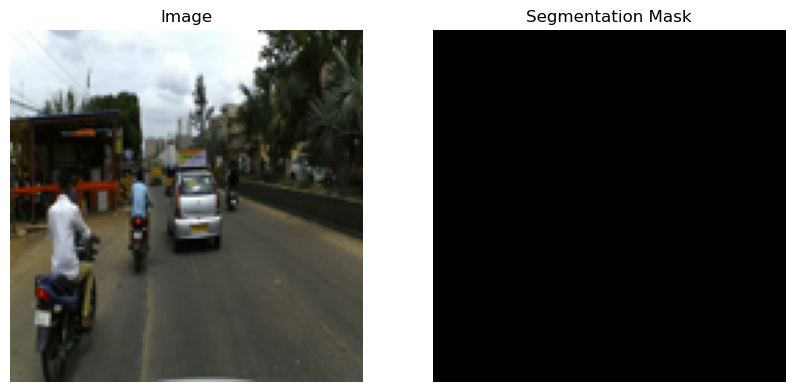

In [67]:
import matplotlib.pyplot as plt

def visualize_sample(idx):
    plt.figure(figsize=(10, 5))

    # Display Image
    plt.subplot(1, 2, 1)
    plt.imshow(idd_images[idx])
    plt.title("Image")
    plt.axis("off")

    # Display Mask
    plt.subplot(1, 2, 2)
    plt.imshow(idd_masks[idx], cmap="gray")
    plt.title("Segmentation Mask")
    plt.axis("off")

    plt.show()

# Show a random sample
import random
visualize_sample(random.randint(0, len(idd_images)-1))


In [9]:
import os
import shutil
from tqdm import tqdm

def reorganize_idd_dataset(source_root, target_root):
    """
    Reorganizes IDD dataset with proper handling of cases where:
    - gtFine only has train and val folders
    - leftImg8bit has train, val, test folders
    """
    # Create target directory structure
    os.makedirs(os.path.join(target_root, 'leftImg8bit', 'train'), exist_ok=True)
    os.makedirs(os.path.join(target_root, 'leftImg8bit', 'val'), exist_ok=True)
    os.makedirs(os.path.join(target_root, 'leftImg8bit', 'test'), exist_ok=True)
    os.makedirs(os.path.join(target_root, 'gtFine', 'train'), exist_ok=True)
    os.makedirs(os.path.join(target_root, 'gtFine', 'val'), exist_ok=True)

    # Process each split
    for split in ['train', 'val', 'test']:
        print(f"\nProcessing {split} split...")
        
        # Image directories (exists for all splits)
        img_source_dir = os.path.join(source_root, 'leftImg8bit', split)
        img_target_dir = os.path.join(target_root, 'leftImg8bit', split)
        
        # JSON directories (only for train/val)
        if split in ['train', 'val']:
            json_source_dir = os.path.join(source_root, 'gtFine', split)
            json_target_dir = os.path.join(target_root, 'gtFine', split)
        
        # Get all subfolders (like '0', '1', etc.)
        subfolders = [f for f in os.listdir(img_source_dir) 
                     if os.path.isdir(os.path.join(img_source_dir, f))]
        
        for subfolder in tqdm(subfolders, desc=f"Processing {split} images"):
            # Process images
            img_files = [f for f in os.listdir(os.path.join(img_source_dir, subfolder))
                         if f.endswith('_leftImg8bit.png')]
            
            for img_file in img_files:
                # Copy image
                src_img = os.path.join(img_source_dir, subfolder, img_file)
                dst_img = os.path.join(img_target_dir, img_file)
                shutil.copy2(src_img, dst_img)
                
                # Only process JSON for train/val
                if split in ['train', 'val']:
                    json_file = img_file.replace('_leftImg8bit.png', '_gtFine_polygons.json')
                    src_json = os.path.join(json_source_dir, subfolder, json_file)
                    
                    if os.path.exists(src_json):
                        dst_json = os.path.join(json_target_dir, json_file)
                        shutil.copy2(src_json, dst_json)
                    else:
                        print(f"JSON not found: {src_json}")
        
        # Verification
        img_count = len(os.listdir(img_target_dir))
        print(f"Moved {img_count} images to {split}")
        
        if split in ['train', 'val']:
            json_count = len(os.listdir(json_target_dir))
            print(f"Moved {json_count} JSON files to {split}")

# Example usage
source_path = "D:\idd-segmentation.tar.gz\IDD_Segmentation"
target_path = "D:/IDD_Segmentation_Reorganized"
import os
import shutil
from tqdm import tqdm

def reorganize_idd_dataset_with_debug(source_root, target_root):
    """
    Enhanced version with detailed debugging output
    """
    # Create target directory structure
    os.makedirs(os.path.join(target_root, 'leftImg8bit', 'train'), exist_ok=True)
    os.makedirs(os.path.join(target_root, 'leftImg8bit', 'val'), exist_ok=True)
    os.makedirs(os.path.join(target_root, 'leftImg8bit', 'test'), exist_ok=True)
    os.makedirs(os.path.join(target_root, 'gtFine', 'train'), exist_ok=True)
    os.makedirs(os.path.join(target_root, 'gtFine', 'val'), exist_ok=True)

    for split in ['train', 'val', 'test']:
        print(f"\n\n=== Processing {split} split ===")
        
        # Image directories
        img_source_dir = os.path.join(source_root, 'leftImg8bit', split)
        img_target_dir = os.path.join(target_root, 'leftImg8bit', split)
        
        # Verify source directory exists
        if not os.path.exists(img_source_dir):
            print(f"ERROR: Source directory not found: {img_source_dir}")
            continue
            
        print(f"Source image directory: {img_source_dir}")
        print(f"Target image directory: {img_target_dir}")

        # Get all subfolders
        subfolders = [f for f in os.listdir(img_source_dir) 
                     if os.path.isdir(os.path.join(img_source_dir, f))]
        print(f"Found {len(subfolders)} subfolders in source directory")

        if not subfolders:
            print("No subfolders found - checking for direct image files...")
            # Check if images are directly in the split folder (no subfolders)
            img_files = [f for f in os.listdir(img_source_dir) 
                        if f.endswith('_leftImg8bit.png')]
            if img_files:
                print(f"Found {len(img_files)} images directly in {img_source_dir}")
                for img_file in tqdm(img_files, desc=f"Processing {split} images"):
                    src_img = os.path.join(img_source_dir, img_file)
                    dst_img = os.path.join(img_target_dir, img_file)
                    shutil.copy2(src_img, dst_img)
                    print(f"Copied {img_file} to {dst_img}")
            else:
                print(f"No images found in {img_source_dir}")
            continue

        for subfolder in tqdm(subfolders, desc=f"Processing {split} subfolders"):
            subfolder_path = os.path.join(img_source_dir, subfolder)
            img_files = [f for f in os.listdir(subfolder_path) 
                         if f.endswith('_leftImg8bit.png')]
            
            if not img_files:
                print(f"No images found in subfolder {subfolder}")
                continue
                
            print(f"Found {len(img_files)} images in {subfolder}")

            for img_file in img_files:
                # Copy image
                src_img = os.path.join(subfolder_path, img_file)
                dst_img = os.path.join(img_target_dir, img_file)
                
                if not os.path.exists(src_img):
                    print(f"Image not found: {src_img}")
                    continue
                    
                shutil.copy2(src_img, dst_img)
                print(f"Copied {img_file} to {dst_img}")

                # Process JSON for train/val
                if split in ['train', 'val']:
                    json_file = img_file.replace('_leftImg8bit.png', '_gtFine_polygons.json')
                    json_source_dir = os.path.join(source_root, 'gtFine', split)
                    src_json = os.path.join(json_source_dir, subfolder, json_file)
                    
                    if os.path.exists(src_json):
                        dst_json = os.path.join(target_root, 'gtFine', split, json_file)
                        shutil.copy2(src_json, dst_json)
                        print(f"Copied JSON {json_file} to {dst_json}")
                    else:
                        print(f"JSON not found: {src_json}")

        # Final counts
        img_count = len(os.listdir(img_target_dir))
        print(f"\nTotal images moved to {split}: {img_count}")
        
        if split in ['train', 'val']:
            json_count = len(os.listdir(os.path.join(target_root, 'gtFine', split)))
            print(f"Total JSONs moved to {split}: {json_count}")

# Example usage
source_path = "D:\idd-segmentation.tar.gz\IDD_Segmentation"
target_path = "D:/IDD_Segmentation_Reorganized"

print("=== Starting reorganization ===")
print(f"Source path: {source_path}")
print(f"Target path: {target_path}")

reorganize_idd_dataset_with_debug(source_path, target_path)

print("\n=== Verification ===")
for split in ['train', 'val', 'test']:
    img_dir = os.path.join(target_path, 'leftImg8bit', split)
    if os.path.exists(img_dir):
        print(f"{split} images: {len(os.listdir(img_dir))} files")
    else:
        print(f"{split} image directory not created")
        
    if split in ['train', 'val']:
        json_dir = os.path.join(target_path, 'gtFine', split)
        if os.path.exists(json_dir):
            print(f"{split} JSONs: {len(os.listdir(json_dir))} files")
        else:
            print(f"{split} JSON directory not created")

reorganize_idd_dataset(source_path, target_path)

=== Starting reorganization ===
Source path: D:\idd-segmentation.tar.gz\IDD_Segmentation
Target path: D:/IDD_Segmentation_Reorganized


=== Processing train split ===
ERROR: Source directory not found: D:\idd-segmentation.tar.gz\IDD_Segmentation\leftImg8bit\train


=== Processing val split ===
ERROR: Source directory not found: D:\idd-segmentation.tar.gz\IDD_Segmentation\leftImg8bit\val


=== Processing test split ===
ERROR: Source directory not found: D:\idd-segmentation.tar.gz\IDD_Segmentation\leftImg8bit\test

=== Verification ===
train images: 0 files
train JSONs: 0 files
val images: 0 files
val JSONs: 0 files
test images: 0 files

Processing train split...


<>:66: SyntaxWarning: invalid escape sequence '\i'
<>:164: SyntaxWarning: invalid escape sequence '\i'
<>:66: SyntaxWarning: invalid escape sequence '\i'
<>:164: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_26548\845282497.py:66: SyntaxWarning: invalid escape sequence '\i'
  source_path = "D:\idd-segmentation.tar.gz\IDD_Segmentation"
C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_26548\845282497.py:164: SyntaxWarning: invalid escape sequence '\i'
  source_path = "D:\idd-segmentation.tar.gz\IDD_Segmentation"
C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_26548\845282497.py:66: SyntaxWarning: invalid escape sequence '\i'
  source_path = "D:\idd-segmentation.tar.gz\IDD_Segmentation"
C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_26548\845282497.py:164: SyntaxWarning: invalid escape sequence '\i'
  source_path = "D:\idd-segmentation.tar.gz\IDD_Segmentation"


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\idd-segmentation.tar.gz\\IDD_Segmentation\\leftImg8bit\\train'